<a href="https://colab.research.google.com/github/neha-goyal55/EDA-Project/blob/main/Copy_of_EDA_Hotel_booking_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#INTRODUCTION

#This data set contains booking information for a city hotel and a resort hotel and includes information such as when the booking was made, length of stay, the number of adults, children and babies, and the number of available parking spaces, among other things. All personally identifying information has from the data.

We will perform exploratory data analysis with python to get insight from the data.

#Import Packages

Lets import dataset and packages

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/Hotel Bookings.csv'
cp_df=pd.read_csv(file_path)

In [ ]:
#check the decoration
cp_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
# Data at glance
cp_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
cp_df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [ ]:
cp_df.shape

(119390, 32)

In [ ]:
cp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
cp_df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [ ]:
df=cp_df.copy()


In [ ]:
df['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [ ]:
df['is_canceled'].unique()

array([0, 1])

In [ ]:
df['is_canceled'].unique()

array([0, 1])

In [ ]:
df['arrival_date_year'].unique()

array([2015, 2016, 2017])

In [ ]:
df['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [ ]:
df['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [ ]:
df['distribution_channel'].unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [ ]:
df['children'].unique() 

array([ 0.,  1.,  2., 10.,  3., nan])

In [ ]:
# Cleaning the Data 

df[df.duplicated()].shape 

(31994, 32)

In [ ]:
# Dropping duplicate values
df.drop_duplicates(inplace = True)

In [ ]:
df.shape

(87396, 32)

In [ ]:
df.isnull().sum().sort_values

<bound method Series.sort_values of hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             452
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             12193
comp

In [ ]:
# Handling Missing data

missing_data = pd.DataFrame([df.isnull().sum(),df.isnull().sum()*100.0/df.shape[0]]).T
missing_data.columns = ['No. of Missing Data', '% Missing Data']
missing_data

,No. of Missing Data,% Missing Data
hotel,0.0,0.000000
is_canceled,0.0,0.000000
lead_time,0.0,0.000000
arrival_date_year,0.0,0.000000
arrival_date_month,0.0,0.000000
arrival_date_week_number,0.0,0.000000
arrival_date_day_of_month,0.0,0.000000
stays_in_weekend_nights,0.0,0.000000
stays_in_week_nights,0.0,0.000000
adults,0.0,0.000000


0.004% of rows have missing data in children column. Now we will look at the distribution of this missing data.

In [ ]:
df['children'].value_counts()

0.0     79028
1.0      4695
2.0      3593
3.0        75
10.0        1
Name: children, dtype: int64

Most booking had no children and hence we will fill the missing rows for the children with 0



In [ ]:
df['children'].fillna(0,inplace=True)

0.5% of rows have missing data in country column. Now we will look at the distribution of this missing information.

In [ ]:
country_data = pd.DataFrame([df['country'].value_counts(),df['country'].value_counts()*100/df.shape[0]]).T
country_data.columns = ['Count', '% Distribution']
country_data

,Count,% Distribution
PRT,27453.0,31.412193
GBR,10433.0,11.937617
FRA,8837.0,10.111447
ESP,7252.0,8.297863
DEU,5387.0,6.163898
...,...,...
MMR,1.0,0.001144
BFA,1.0,0.001144
CYM,1.0,0.001144
MLI,1.0,0.001144


In [ ]:
df['country'].fillna('NaN',inplace=True)

In [ ]:
df['agent'].fillna('NaN',inplace=True)
df ['company'].fillna('NaN',inplace=True)

Let's confirm all missing data have been handled

In [ ]:
perc_missing_data = pd.DataFrame([df.isnull().sum(),df.isnull().sum()*100.0/df.shape[0]]).T
perc_missing_data.columns = ['No. of Missing Data', '% Missing Data']
perc_missing_data

,No. of Missing Data,% Missing Data
hotel,0.0,0.0
is_canceled,0.0,0.0
lead_time,0.0,0.0
arrival_date_year,0.0,0.0
arrival_date_month,0.0,0.0
arrival_date_week_number,0.0,0.0
arrival_date_day_of_month,0.0,0.0
stays_in_weekend_nights,0.0,0.0
stays_in_week_nights,0.0,0.0
adults,0.0,0.0


#Best time of each year for the hotels where maximum bookings takes place

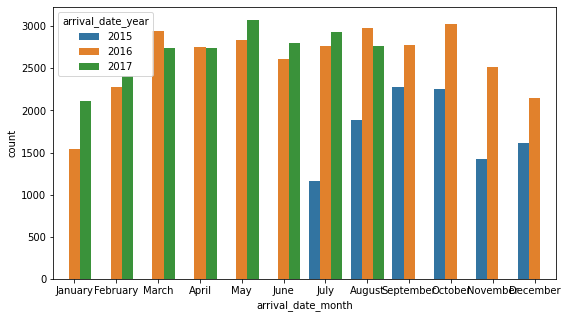

In [ ]:
plt.figure(figsize=(9,5))
sns.countplot(data= df[df['is_canceled']==0],
              x = 'arrival_date_month',
              hue = 'arrival_date_year',
            
              order= ['January','February','March','April','May','June','July','August','September','October','November','December']);

#Inference

.From the chart it is clearly evident that the bookings have increased in 
2016 compared to 2015 and in 2017 it has almost maintained the same number of bookings as in 2016

.Since only in July and August we have all the three years data available the total number of bookings is maximum in these months

.Considering the bookings year wise we can conclude that the month of May has the highest booking in 2017 similarly in 2015 the months of September & October has the highest booking and in 2016 the months of October & March has the highest bookings














#From which country the hotels gets the maximum bookings 

In [ ]:
#x= df['country'].value_counts()
#y = df['country'].value_counts().sum()
#print(y)
#print(x[:10])
x1=pd.DataFrame( df['country'].value_counts())
x1.columns=['No. of bookings']
x1.index.names=['country1']
x1.head()

,No. of bookings
country1,
PRT,27453
GBR,10433
FRA,8837
ESP,7252
DEU,5387


# Most demanded meal type by most customer of hotel booking

In [ ]:
plt.figure(figsize=(9,5))
sns.barplot(data=x1[:10],
            x= 'country1',
            y='No. of bookings',
            hue ='hotel');

ValueError: ignored

<Figure size 648x360 with 0 Axes>

#Which customer type contribute the most revenue?

In [ ]:
df['customer_type'].value_counts()

Transient          71986
Transient-Party    11727
Contract            3139
Group                544
Name: customer_type, dtype: int64

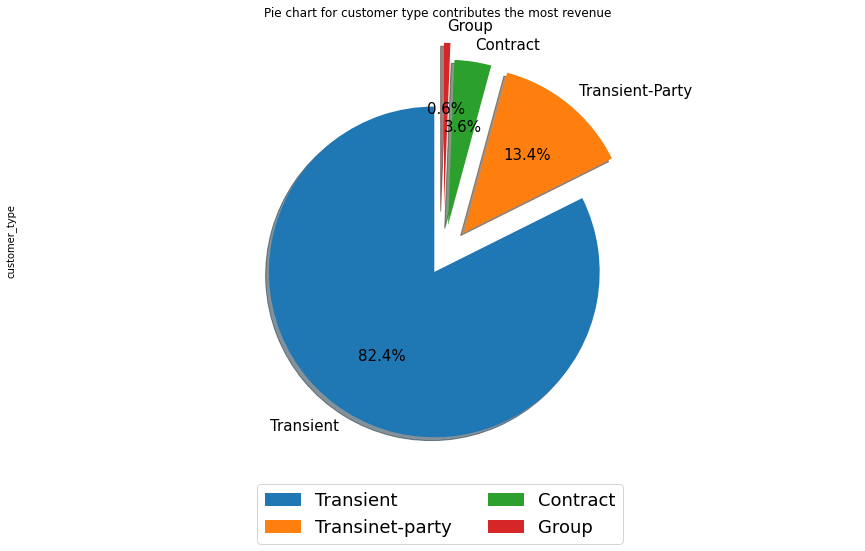

In [ ]:
df['customer_type'].value_counts().plot.pie(explode=(0.1,0.2,0.2,0.3), shadow=True, startangle=90, autopct='%1.1f%%',figsize=(15,8),fontsize=15 )

plt.axis('equal')
plt.title ('Pie chart for customer type contributes the most revenue ')

plt.legend(labels=['Transient','Transinet-party','Contract','Group'], fontsize=18, loc='upper center', 
           bbox_to_anchor=(0.5, -0.04), ncol=2)
plt.show()

#

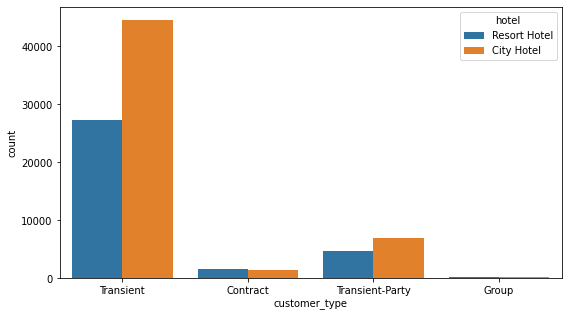

In [ ]:
plt.figure(figsize =(9,5))
sns.countplot(data=df,
              x='customer_type',
              hue='hotel');

#What are the major reasons that a customer cancel his booking?

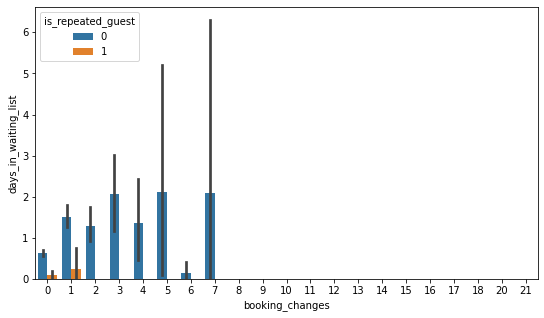

In [ ]:
plt.figure(figsize= (9,5))
sns.barplot(data= df,
            x= 'booking_changes',
            y = 'days_in_waiting_list',
            hue = 'is_repeated_guest');

#Which company or agent gives us the maximum booking?

1st Sorting with Agent

In [ ]:
df1=pd.DataFrame( df['agent'].value_counts())
df1.columns=['No. of bookings']
df1.index.names=['Agent ID']
df1.head()

,No. of bookings
Agent ID,
9.0,28759
240.0,13028
NaN,12193
14.0,3349
7.0,3300


2nd Sorting with company

In [ ]:
df2=pd.DataFrame( df['company'].value_counts())
df2.columns=['No. of bookings']
df2.index.names=['Company ID']
df2.head()

,No. of bookings
Company ID,
NaN,82137
40.0,851
223.0,503
45.0,238
153.0,206


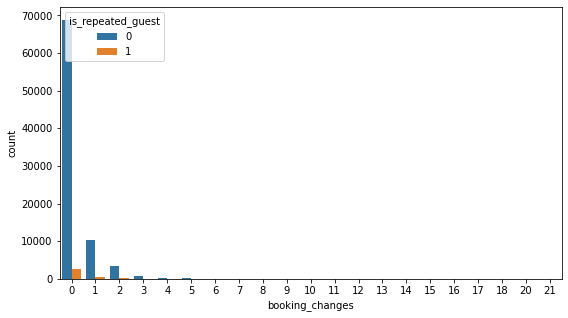

In [ ]:
plt.figure(figsize= (9,5))
sns.countplot(data= df,
            x= 'booking_changes',
            hue='is_repeated_guest');
            

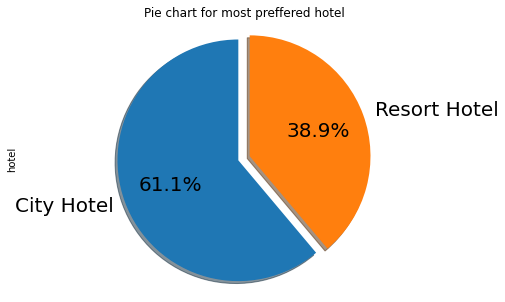

In [ ]:
# Which type of hotel is preffered by guest?

df['hotel'].value_counts().plot.pie(explode=(0.1,0.0), shadow=True, startangle=90, autopct='%1.1f%%',figsize=(8,5),fontsize=20)

plt.axis('equal')
plt.title ('Pie chart for most preffered hotel')
plt.show()

Which customer type contributes the most revenue?